# Manage Your Portfolio’s Risk With Value At Risk

VaR is one way professional traders manage risk. It estimates how much your portfolio might lose over a set time period. Using VaR is a good way to avoid losing all your money if the market moves against you.

VaR lets you say something like this:

“With 95% confidence, my portfolio’s loss will not exceed \\$750 in one day.

Unfortunately, most non-professional traders don’t use VaR. They either don’t know it exists or think it’s too complicated to use.

## Step 1: Import The Libraries
We’ll use a new library today: scipy. Scipy is a library for scientific and technical computing. It has a lot of statistical functions.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

import yfinance as yf

## Step 2: Define The Variables
We’ll simulate a portfolio of stocks. To do this, we need to define the symbols, the weights, and the investment amount.

We also define the confidence level which we’ll use later.

In [5]:
# create your portfolio of stocks
tickers = ["AAPL", "META", "C", "DIS"]

# pick the weights of each stock (must add to 1)
weights = np.array([0.25, 0.3, 0.15, 0.3])

# the size of the portfolio
initial_investment = 1_000

# the confidence interval (95%)
confidence = 0.05

Now we can get the stock data for all the symbols in one line of code.



In [6]:
data = yf.download(tickers, start="2018-01-01", end="2021-12-31")
data = data.Close

[*********************100%***********************]  4 of 4 completed


## Step 3: Compute Portfolio Statistics
Computing portfolio returns is not as simple as just adding up the returns of the individual stocks. We need to take the covariance between the stocks in the portfolio into account.

Fortunately, this is easy in Python using pandas and NumPy.

In [7]:
# compute daily returns of each stock
returns = data.pct_change()

In [8]:
# compute the portfolio covariance matrix
cov_matrix = returns.cov()

In [9]:
# compute the daily mean returns of each stock
mean_returns = returns.mean()

In [10]:
# calculate portfolio mean return
port_mean = mean_returns.dot(weights)

In [11]:
# portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

In [12]:
# mean of investment returns
mean_investment = (1 + port_mean) * initial_investment

In [13]:
# Standard deviation of investmnet returns
investment_stdev = initial_investment * port_stdev

First, we get the daily returns of the stocks in the portfolio. From there we get the mean return for all the data. We apply the weights to those returns and multiply them by the portfolio value to get the portfolio mean return.

Then we compute the covariance between the returns, take the square root of the covariance-adjusted weights of the stocks in the portfolio, and compute the portfolio standard deviation.

The portfolio mean and standard deviation are used in the next step.



## Step 4: Compute VaR
To find the VaR of this portfolio, we start by finding the point on the density plot based on the confidence level, mean, and standard deviation.

This is where scipy comes in.



In [14]:
# ppf takes a percentage and returns a standard deviation 
# multiplier for what value that percentage occurs at.
# It is equivalent to a one-tail test on the density plot.
percent_point = norm.ppf(confidence, mean_investment, investment_stdev)

VaR is the portfolio value less this amount.



In [15]:
# Calculate the VaR at our confidence interval
value_at_risk = initial_investment - percent_point

# print it out
f"Portfolio VaR: {value_at_risk}"

'Portfolio VaR: 28.335597603904944'

This is the most you can expect to lose in one day with 95% confidence.



## Bonus: Scaling VaR To Different Time Frames
What about over one week? Or one month?

Stock returns increase with the square root of time. Therefore to scale the value at risk, we multiply it by the square root of time. This sounds scary but it’s simple in Python.

Multiply the one-day VaR by the square root of one (day) through the square root of 30 (days).

In [16]:
# multiply by sqrt of time because stdev of stock returns increase
# proportional to the square root of time
value_at_risks = value_at_risk * np.sqrt(range(1, 31))

Then we plot it.



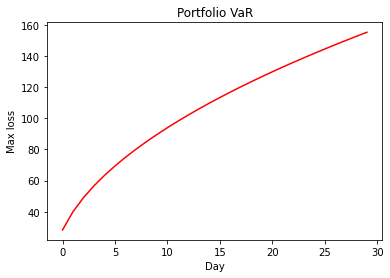

In [17]:
# build plot of VaR over time
plt.xlabel("Day")
plt.ylabel("Max loss")
plt.title("Portfolio VaR")
plt.plot(value_at_risks, "r")

VaR is a simple measure that comes with various assumptions, caveats, and criticisms. It should be used as one of many risk management techniques. Despite its simplicity, it is a useful tool in the trader’s tool belt.

Read more about VaR [here](https://preview.convertkit-mail2.com/click/dpheh0hzhm/aHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvVmFsdWVfYXRfcmlzaw==).